In [111]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn import tree
from sklearn.datasets import load_digits

In [112]:
dig = load_digits()

In [113]:
print(dig.feature_names)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [114]:

print(dig.target_names)


[0 1 2 3 4 5 6 7 8 9]


In [115]:
df = pd.DataFrame(dig.data, columns=[f'pixel_{i}' for i in range(dig.data.shape[1])])

In [116]:
df['target'] = dig.target

In [117]:
df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [118]:
df.columns

Index(['pixel_0', 'pixel_1', 'pixel_2', 'pixel_3', 'pixel_4', 'pixel_5',
       'pixel_6', 'pixel_7', 'pixel_8', 'pixel_9', 'pixel_10', 'pixel_11',
       'pixel_12', 'pixel_13', 'pixel_14', 'pixel_15', 'pixel_16', 'pixel_17',
       'pixel_18', 'pixel_19', 'pixel_20', 'pixel_21', 'pixel_22', 'pixel_23',
       'pixel_24', 'pixel_25', 'pixel_26', 'pixel_27', 'pixel_28', 'pixel_29',
       'pixel_30', 'pixel_31', 'pixel_32', 'pixel_33', 'pixel_34', 'pixel_35',
       'pixel_36', 'pixel_37', 'pixel_38', 'pixel_39', 'pixel_40', 'pixel_41',
       'pixel_42', 'pixel_43', 'pixel_44', 'pixel_45', 'pixel_46', 'pixel_47',
       'pixel_48', 'pixel_49', 'pixel_50', 'pixel_51', 'pixel_52', 'pixel_53',
       'pixel_54', 'pixel_55', 'pixel_56', 'pixel_57', 'pixel_58', 'pixel_59',
       'pixel_60', 'pixel_61', 'pixel_62', 'pixel_63', 'target'],
      dtype='object')

In [119]:
x = df[['pixel_0', 'pixel_1', 'pixel_2', 'pixel_3', 'pixel_4', 'pixel_5',
       'pixel_6', 'pixel_7', 'pixel_8', 'pixel_9', 'pixel_10', 'pixel_11',
       'pixel_12', 'pixel_13', 'pixel_14', 'pixel_15', 'pixel_16', 'pixel_17',
       'pixel_18', 'pixel_19', 'pixel_20', 'pixel_21', 'pixel_22', 'pixel_23',
       'pixel_24', 'pixel_25', 'pixel_26', 'pixel_27', 'pixel_28', 'pixel_29',
       'pixel_30', 'pixel_31', 'pixel_32', 'pixel_33', 'pixel_34', 'pixel_35',
       'pixel_36', 'pixel_37', 'pixel_38', 'pixel_39', 'pixel_40', 'pixel_41',
       'pixel_42', 'pixel_43', 'pixel_44', 'pixel_45', 'pixel_46', 'pixel_47',
       'pixel_48', 'pixel_49', 'pixel_50', 'pixel_51', 'pixel_52', 'pixel_53',
       'pixel_54', 'pixel_55', 'pixel_56', 'pixel_57', 'pixel_58', 'pixel_59',
       'pixel_60', 'pixel_61', 'pixel_62', 'pixel_63']]
y = df['target']


x,y

(      pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
 0         0.0      0.0      5.0     13.0      9.0      1.0      0.0      0.0   
 1         0.0      0.0      0.0     12.0     13.0      5.0      0.0      0.0   
 2         0.0      0.0      0.0      4.0     15.0     12.0      0.0      0.0   
 3         0.0      0.0      7.0     15.0     13.0      1.0      0.0      0.0   
 4         0.0      0.0      0.0      1.0     11.0      0.0      0.0      0.0   
 ...       ...      ...      ...      ...      ...      ...      ...      ...   
 1792      0.0      0.0      4.0     10.0     13.0      6.0      0.0      0.0   
 1793      0.0      0.0      6.0     16.0     13.0     11.0      1.0      0.0   
 1794      0.0      0.0      1.0     11.0     15.0      1.0      0.0      0.0   
 1795      0.0      0.0      2.0     10.0      7.0      0.0      0.0      0.0   
 1796      0.0      0.0     10.0     14.0      8.0      1.0      0.0      0.0   
 
       pixel_8  pixel_9  .

In [120]:
model = RandomForestClassifier()

In [121]:
xtr,xte,ytr,yte = train_test_split(x,y,test_size=0.2,random_state=42)

In [122]:
xtr,xte,ytr,yte

(      pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
 1734      0.0      0.0      3.0     14.0      1.0      0.0      0.0      0.0   
 855       0.0      0.0      9.0      9.0      4.0      0.0      0.0      0.0   
 1642      0.0      0.0      0.0     10.0     13.0      3.0      0.0      0.0   
 175       0.0      1.0     10.0     16.0     16.0     11.0      0.0      0.0   
 925       0.0      0.0      6.0     14.0     13.0      3.0      0.0      0.0   
 ...       ...      ...      ...      ...      ...      ...      ...      ...   
 1130      0.0      1.0     13.0     16.0     16.0     12.0      1.0      0.0   
 1294      0.0      3.0     15.0     16.0     15.0      3.0      0.0      0.0   
 860       0.0      0.0      9.0     16.0     16.0     13.0      1.0      0.0   
 1459      0.0      0.0      1.0     13.0     16.0     10.0      0.0      0.0   
 1126      0.0      0.0      1.0     12.0     11.0      1.0      0.0      0.0   
 
       pixel_8  pixel_9  .

In [123]:
model.fit(xtr,ytr)

RandomForestClassifier()

In [124]:
model.predict(xte)

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 4, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 7, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 9, 1, 4, 7, 6, 5, 1, 5,
       5, 1, 5, 2, 8, 8, 9, 5, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [125]:
from sklearn.metrics import accuracy_score
print(accuracy_score(yte,model.predict(xte)))

0.9722222222222222


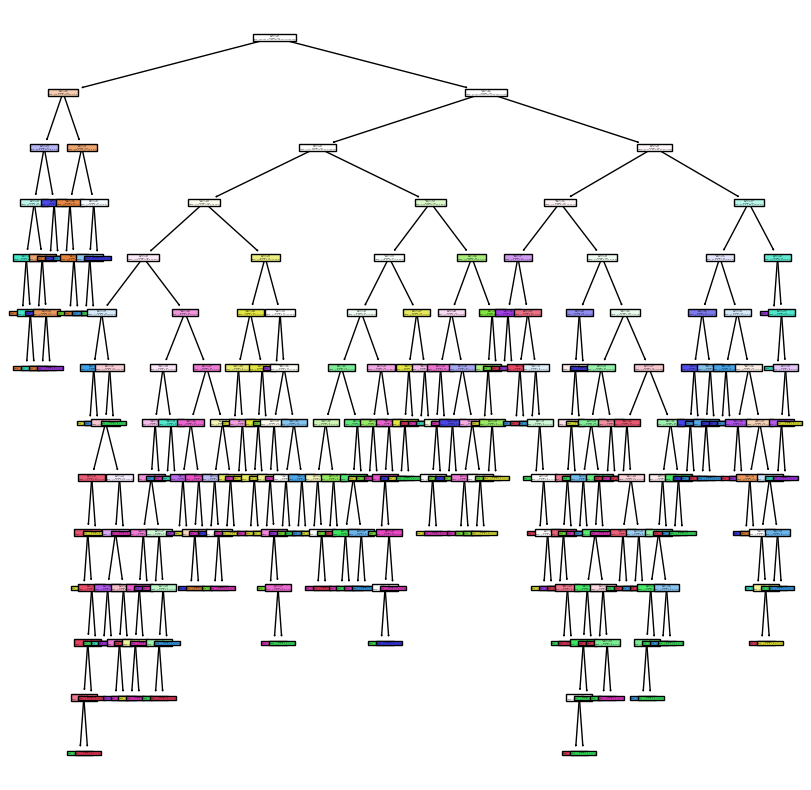

In [126]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import tree

# Assuming you have already trained your RandomForestClassifier model
# model = RandomForestClassifier()
# model.fit(X_train, y_train)

# Extracting the first tree from the random forest
tree_to_visualize = model.estimators_[50]

# Visualizing the tree
plt.figure(figsize=(10, 10))
tree.plot_tree(tree_to_visualize, filled=True)
plt.show()


In [127]:
model2 = RandomForestClassifier(criterion='entropy')

In [128]:
model2.fit(xtr,ytr)

RandomForestClassifier(criterion='entropy')

In [129]:
model2.predict(xte)

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 4, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 7, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 1, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 5, 1, 5,
       5, 1, 5, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [130]:
from sklearn.metrics import accuracy_score
print(accuracy_score(yte,model2.predict(xte)))

0.975


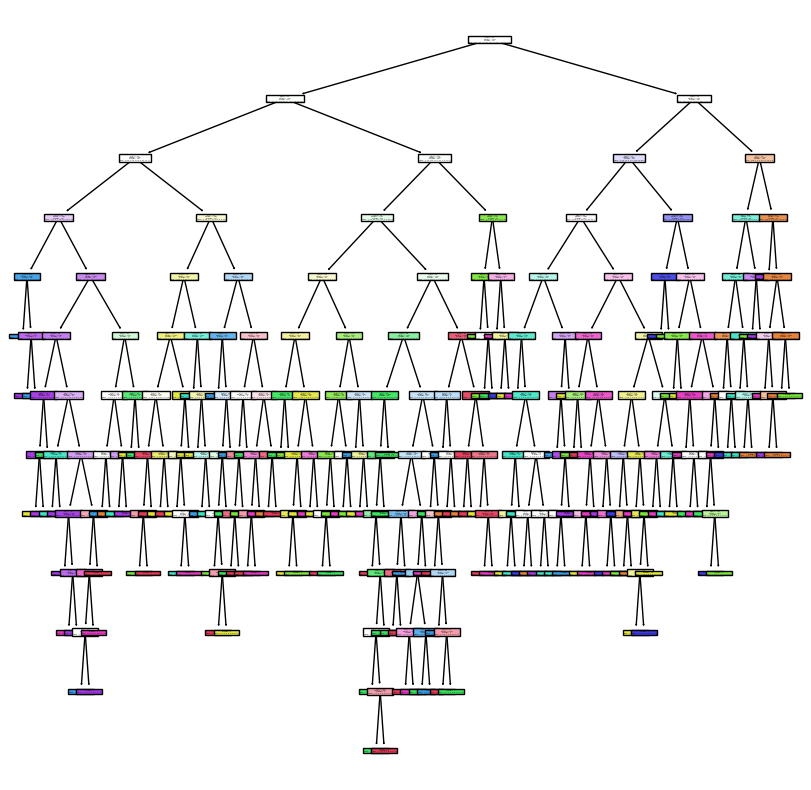

In [131]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import tree

# Assuming you have already trained your RandomForestClassifier model
# model = RandomForestClassifier()
# model.fit(X_train, y_train)

# Extracting the first tree from the random forest
tree_to_visualize = model2.estimators_[50]

# Visualizing the tree
plt.figure(figsize=(10, 10))
tree.plot_tree(tree_to_visualize, filled=True)
plt.show()


In [132]:
from sklearn.ensemble import RandomForestRegressor

In [133]:
df2 = pd.read_csv('/home/student/house-prices.csv')

In [134]:
df2

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West


In [135]:
le = LabelEncoder()
df2['Brick'] = le.fit_transform(df2['Brick'])
df2['Neighborhood'] = le.fit_transform(df2['Neighborhood'])
df2

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,0,0
1,2,114200,2030,4,2,3,0,0
2,3,114800,1740,3,2,1,0,0
3,4,94700,1980,3,2,3,0,0
4,5,119800,2130,3,3,3,0,0
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,1,0
124,125,147900,2160,4,3,3,1,0
125,126,113500,2070,2,2,2,0,1
126,127,149900,2020,3,3,1,0,2


In [136]:
model3 = RandomForestRegressor()

In [137]:
xtr2,xte2,ytr2,yte2 = train_test_split(df2[['SqFt','Bedrooms','Bathrooms','Offers','Brick','Neighborhood']],df2['Price'],test_size=0.2,random_state=42)

In [138]:
xtr2,ytr2,xte2,yte2

(     SqFt  Bedrooms  Bathrooms  Offers  Brick  Neighborhood
 70   1950         3          3       3      1             2
 78   2130         3          2       3      0             1
 47   2050         3          2       6      0             1
 0    1790         2          2       2      0             0
 12   1910         3          2       4      0             1
 ..    ...       ...        ...     ...    ...           ...
 106  2130         3          2       4      0             1
 14   2590         4          3       4      0             2
 92   2110         3          2       2      0             2
 51   1860         2          2       3      0             1
 102  2410         3          3       4      0             0
 
 [102 rows x 6 columns],
 70     166700
 78     121300
 47      90300
 0      114300
 12     102600
         ...  
 106    108500
 14     176800
 92     142600
 51      91100
 102    136800
 Name: Price, Length: 102, dtype: int64,
      SqFt  Bedrooms  Bathrooms  Of

In [139]:
model3.fit(xtr2,ytr2)

RandomForestRegressor()

In [140]:
pred = model3.predict(xte2)
pred

array([119490.        , 107726.        , 164321.        , 122957.        ,
       153550.33333333, 138663.        , 150388.        , 106110.        ,
       179469.        , 146490.        , 175195.        , 111845.        ,
       135169.        , 130315.        , 140105.        , 116632.        ,
       111448.        , 142979.        , 125609.        ,  77562.66666667,
       123397.        , 124694.        , 112667.        , 122118.        ,
       173277.        , 110272.        ])

In [141]:
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error',mean_absolute_error(yte2,pred))

Mean Absolute Error 9921.141025641025
